# Weather Analysis
## Overview
### This Python script will visualize the weather of 500 unique cities across the world in random locations selected using Citypy. Citipy is a city-finding python package that was used to find randomly located cities. The OpenWeatherMap API was used to return current weather statistics for those cities.

### A series of scatter plots will be used to showcase the following relationships:
* Temperature (F) vs. Latitude.
* Humidity (%) vs. Latitude.
* Cloudiness (%) vs. Latitude.
* Wind Speed (mph) vs. Latitude.

### The script will:
* Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
* Perform a weather check on each of the cities using a series of successive API calls.
* Include a print log of each city as it's being processed with the city number, city name, and requested URL.
* Save both a CSV of all data retrieved and png images for each scatter plot.

# WeatherPy

Observable Trends:
1. Temperature increases as the latitude approaches the equator (latitude 0).
2. Humidity is more concentrated at higher values as the latitude approaches the equator (latitude 0).
3. Wind speeds increase as the latitude goes away from the equator (latitude -90 and 90).


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Data Retrieval

In [2]:
# Declare variables describing the scope of lat/lng search for cities. 
# Lat ranges from -90 to 90. Lng ranges from -180 to 180.
lat = {'min': -90, 'max': 90}
lng = {'min': -180, 'max': 180}

# Create arrays containing increments of lat and long.
lat_values = np.arange(lat['min'], lat['max'], 0.01)
lng_values = np.arange(lng['min'], lng['max'], 0.01)

In [3]:
# Create an empty data frame to city and weather data
column_names = ('city_name', 'country_code', 'rand_lat', 'rand_lng', 'Latitude', 'Longitude','Temp (F)',
            'Humidity (%)','Cloudiness (%)','Wind Speed (mph)')
cities_df = pd.DataFrame(columns = column_names)
cities_df

,city_name,country_code,rand_lat,rand_lng,Latitude,Longitude,Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)


In [5]:
# Loop through and grab the Temp, Humidity, Cloudiness and Wind Speed using OpenWeatherMapAPI
    
while len(cities_df) < sample_size:
    # Choose a random point within our lat-lng domain.
    rand_lat = random.choice(lat_values)
    rand_lng = random.choice(lng_values)
    # Call citipy's nearest_city() method to get a city object.
    city = citipy.nearest_city(rand_lat, rand_lng)
    city_name = city.city_name
    country_code = city.country_code
    # Call Open Weather Map API to obtain data and append it to df
    url = target_url + city_name + ',' + country_code + '&units=' + units + '&APPID=' + api_key
    weather_response = requests.get(url)
    weather_json = weather_response.json()
    if weather_json["cod"] == 200:
        print('City: %s. %s' % (weather_json['name'], url))
        latitude = weather_json["coord"]["lat"]
        longitude = weather_json["coord"]["lon"]
        temp = weather_json["main"]["temp"]
        humidity = weather_json["main"]["humidity"]
        cloud = weather_json["clouds"]["all"]
        wind = weather_json["wind"]["speed"]
        # Avoid repeating cities
        if city_name not in cities_df.city_name.values:
            print('Status code: %s. DF length is now: %d' % (str(weather_json["cod"]), len(cities_df)+1))
            # Append data to df columns
            cities_df.set_value(record, "city_name", city_name)
            cities_df.set_value(record, "country_code", country_code)
            cities_df.set_value(record, "rand_lat", rand_lat)
            cities_df.set_value(record, "rand_lng", rand_lng)
            cities_df.set_value(record, "Latitude", latitude)
            cities_df.set_value(record, "Longitude", longitude)
            cities_df.set_value(record, "Temp (F)", temp)
            cities_df.set_value(record, "Humidity (%)", humidity)
            cities_df.set_value(record, "Cloudiness (%)", cloud)
            cities_df.set_value(record, "Wind Speed (mph)", wind)

            record += 1
        
            # Wait between 1-4 seconds before next loop
            time.sleep(random.randint(1, 4))
        else:
            pass
    else:
        pass
    
print(
"------------------------------\n"
"Data Retrieval Complete\n"
"------------------------------\n"
)

# Visualize df
cities_df.head()

NameError: name 'random' is not defined

In [ ]:
# The total sample size.
len(cities_df)

## Save csv

In [ ]:
# Save the DataFrame as a csv
cities_df.to_csv("Output/weatherpy_data.csv", encoding="utf-8", index=False)

## Plot Graphs

###  Latitude vs. Temperature Plot

In [ ]:
# Build a scatter plot City Latitude vs. Temperature
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Temp (F)", data=cities_df, fit_reg=False).set_title('Temp (F) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_temp.png")

# Show plot
plt.show()

### Latitude vs. Humidity Plot

NameError: name 'cities_df' is not defined

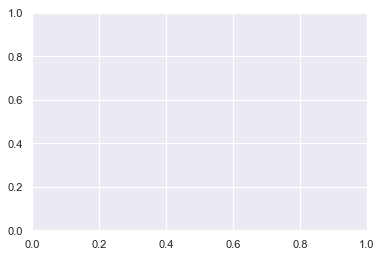

In [3]:
# Build a scatter plot City Latitude vs. Humidity
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Humidity (%)", data=cities_df, fit_reg=False).set_title('Humidity (%) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_humidity.png")

# Show plot
plt.show()

### Latitude vs. Cloudiness Plot

In [ ]:
# Build a scatter plot City Latitude vs. Cloudiness
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Cloudiness (%)", data=cities_df, fit_reg=False).set_title('Cloud Cover (%) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_cloud.png")

# Show plot
plt.show()

### Latitude vs. Wind Speed Plot

In [ ]:
# Build a scatter plot City Latitude vs. Wind Speed
sns.set_style('ticks')
sns.set(style="darkgrid")
fig, ax = plt.subplots()
p = sns.regplot(x="Latitude", y="Wind Speed (mph)", data=cities_df, fit_reg=False).set_title('Wind Speed (mph) by Latitude')

# Save the figure
plt.savefig("Output/lat_v_wind.png")

# Show plot
plt.show()